# Translation of Images 

#### Importing Required Libraries 

In [1]:
#%matplotlib inline
import numpy as np 
#from matplotlib import pyplot as plt 
import cv2
import imageio
import SimpleITK
import sys
from pylab import *


#### Reading the images 

In [2]:
cells = cv2.imread("cells_scale.png",0)
lena = cv2.imread("lena_translate.png",0)
pisa = cv2.imread("pisa_rotate.png",0)

#### Defining Interpolation (Bilinear)

Now we will write a function of interpolation,
here we are using bilinear interpolation.
src is the source image and (si,sj) are the source points.
We will interpolate the source points to get the pixel value. 

Here bilnear_interpolation computes the intensity at the source point (si,sj) by bilearly interpolating the 
intensities  in the immediate 2*2 neighbourhood of the source point.

In [3]:
def bilinear_interpolation(src,si,sj):
    #si , sj = src_pt
    #si= ti-ty
    #sj= tj-tx
    i=int(np.floor(si))    
    j=int(np.floor(sj))      ## Here i,j are the co-ordinate points of the top left (t_l)
    t_l = i , j 
    
    ##Now the remaining three co-ordinates with respect to i,j will be 
    t_r = i ,j+1    # Top right
    b_l = i+1 , j   # Bottom Left 
    b_r = i+1 , j+1 # Bottom Right 
    
    ## distance of source point from the top left corner would be 
    di = si - i 
    dj = sj - j 
    
    """
    ## Now calculating the pixel value at the source point by using bilinear interpolation technique
    ## Create a variable pxl_val and assign the pixel value obtained by bilinear interpolating pixel values at t_l,t_r,
    ## b_l,b_r
    ## di,dj that we got is used to obtain the weights for interpolation
    ## We ignore all the target points whose source points lies outside the source image.Hence we assign 
    ## these pixel values as 0.
    """
    
    if t_l[0] >= np.shape(src)[0] or t_l[1] >=np.shape(src)[1] or t_l[0]<=0 or t_l[1]<= 0 :
        pxl_val = 0
    else :
        pxl_val = (1-di)*(1-di)*src[t_l] + (1-di)*(dj)*src[t_r] + (di)*(1-dj)*src[b_l]+ (di)*(dj)*src[b_r]
    
    #return np.unit8(pxl_val)
    return pxl_val



#### Now implementing target to source transformation
Now we use the above bilinear_interpolation function to implement trnasform function which performs T-S (Target to Source) transformation on the source image.
###### The parameters for translating are:
tx=3.75
ty=4.3 

In [4]:
trg = np.zeros(np.shape(lena))
tx=3.75
ty=4.3
def transform(src):
    r , c = np.shape(src)
    
    ## iterating over the target image and assign all the pixel values to them
    for ti in range(r):
        for tj in range(c):
            
            ## Translating 
            si= ti-tx
            sj= tj-ty
            #si,sj=np.array([ti,tj,1])
            #si,sj=si/z,sj/z
            
            ## Assigniing the intensity values of  the target image at (ti,tj) using the bilinear interpolation above.
            #if (0<= si < r-1  & 0<= sj < c-1):
            trg[ti][tj]=bilinear_interpolation(src,si,sj)
            #else:
                #trg[ti][tj]=0
    return trg


#### Defining a trnaslate function 

In [5]:
def translate(src):
    
    #translation=([[1,0,tx],
     #            [0,1,ty],
      #           [0,0,1]])
    return transform(src)


#### Calling the translate function 
Translate the lena image by tx=3.75 and ty=4.3

In [6]:
lena_translated=translate(lena)

#### Source Image

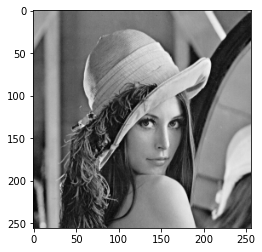

In [7]:
plt.imshow(lena,cmap='gray')
plt.show()

#### Translated Image

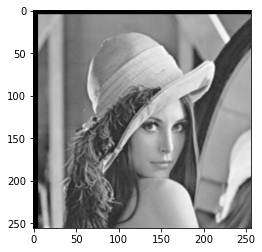

In [8]:
plt.imshow(trg,cmap='gray')
plt.show()

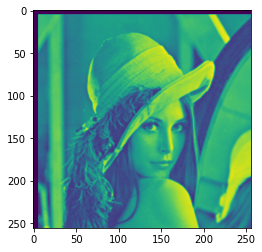

In [9]:
plt.imshow(lena_translated)
plt.show()

In [10]:
cv2.imshow('lena_translated',lena_translated)
cv2.waitKey(0)
cv2.destroyAllWindows()